# 1. Download data

In [1]:
import os
import tarfile
import urllib
import urllib.request

ROOT_PATH = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = ROOT_PATH + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url: str = HOUSING_URL, 
                       housing_path: str = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

# 2. Explore data

In [2]:
import pandas as pd

def load_housing_data(HOUSING_PATH: str = HOUSING_PATH):
    csv_housing_path = os.path.join(HOUSING_PATH, "housing.csv")
    return pd.read_csv(csv_housing_path)


housing = load_housing_data()
print("5 sample đầu tiên:")
housing.head()

5 sample đầu tiên:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
print("THông tin chung về dữ liệu: \n")
housing.info()

THông tin chung về dữ liệu: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:

print("Các trường thông tin trong data: \n", housing.columns.values)

Các trường thông tin trong data: 
 ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value' 'ocean_proximity']


In [5]:
print("Phân loại loại nhà của các quận theo trường ocean_proximity: \n")
print(housing['ocean_proximity'].value_counts())

Phân loại loại nhà của các quận theo trường ocean_proximity: 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


- Tên các cột: count, min, max, tự giải thích ý nghĩa của chúng. Lưu ý rằng các giá trị null sẽ được bỏ qua. Ví du: total_bedroom là 20433 thay vì 20640

- std - standard deviation: đo lường mức độ phân tán của các giá trị. 

- 25%, 50%, 75% lần lượt là các phần trăm tương ứng: tỉ lệ phần trắm dưới 1 giá trị nào đó. 
    + 25%: 25% quận có housing_median_mean thấp hơn 18 tuổi. 
    + 50%: 50% thấp hơn 29 tuổi
    + 75%: 75% thấp hơn 37 tuổi    

In [6]:
print("Mô tả chi tiết về dữ liệu: \n")
housing.describe()

Mô tả chi tiết về dữ liệu: 



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Biểu đồ histogram cho các trường có kiểu dữ liệu là số với trục x: trục số lượng; trục y: trục khoảng giá trị
- Nhận thấy với biểu đồ total_bedrooms: 
    + có khoảng 4800 district có tổng phòng ngủ từ 300-400 phòng
    + có khoảng 4100 district có tông phòng ngủ từ 400-500 phòng. 
    => Ánh xạ bảng describe() thì các quận có 75% tổng số phòng < 647 phòng
- Nhận thây với biểu đồ median_house_value: 
    + giá nhà chiếm phần lớn từ 50000 -> 25000 đô
    => Ánh xạ bảng describer() thì các quận có 75% giá nhà < 264725
    + tuy nhiên ở khoảng 500000 đô lại chiếm rất nhiều. => đây thực chất là các giá trị >= 500000, chúng đã được cắt đi và coi như coi giá 500000.
    => điều này khá nghiêm trọng, bởi vì model có thể học rằng không có giá nhà nào > 500000

- Ngoài ra còn 1 vài vấn đề như: 
    + Các giá trị cột không được scale về cùng 1 khoảng
    + Các giá trị của biểu đồ thường lệch về bên trái

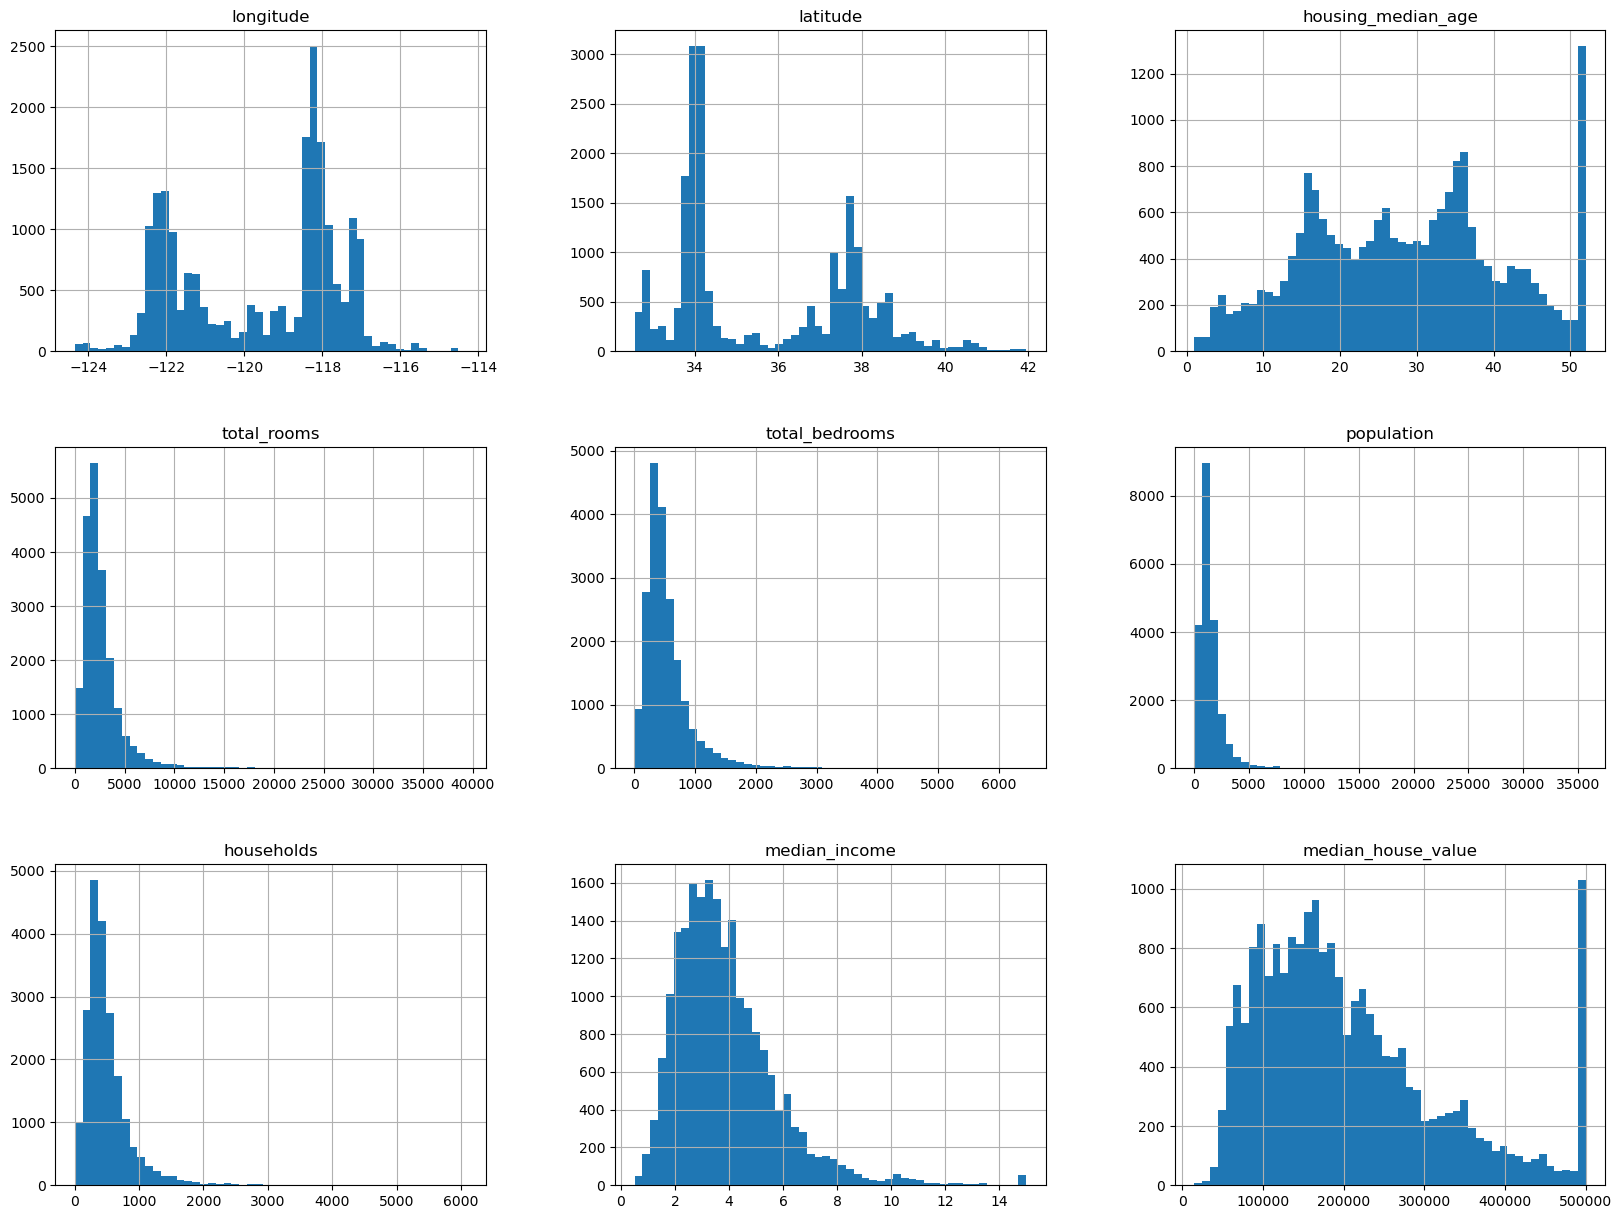

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

# 3. Create Test Set

In [8]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print("Số lượng dữ liệu trong tập train: ", len(train_set))
print("Số lượng dữ liệu trong tập test: ", len(test_set)) 

Số lượng dữ liệu trong tập train:  16512
Số lượng dữ liệu trong tập test:  4128


- Tuy nhiên với cách chia này, mỗi lần chạy lại function này các sample sẽ xáo trộn giữa 2 tập train và test. Đây là cách xáo trộn ngẫu nhiên nên có thể lần chạy thứ 2 sample ở tập test sẽ có mặt trog tập train => Làm mất đi tính chất của tập test

- Vì vậy có 1 cách để khắc phục điều này là trước khi chạy t sẽ set: np.random.seed(42). Ở mỗi lần sau các chỉ có các chỉ số trong tập train và test bị xáo trộn bên trong chúng. 

- Nhưng vẫn còn 1 vấn đề nữa là khi update data mới thì không chắc rằng các cột có bị xáo trộn hay không, vì vậy ta sẽ gán trực tiếp cho mỗi sample 1 id định danh. Flow theo hàm bên dưới

In [9]:
from zlib import crc32

def test_set_check(indentifier, test_ratio):
    return crc32(np.int64(indentifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

print("Số lượng dữ liệu trong tập train: ", len(train_set))
print("Số lượng dữ liệu trong tập test: ", len(test_set))

Số lượng dữ liệu trong tập train:  16512
Số lượng dữ liệu trong tập test:  4128


- Hàm trên sẽ lấy các id của từng sample để tạo ra định danh, tuy nhiên điều này sẽ phải đảm bảo rằng khi thêm data mới các sample sẽ phải thêm vào bên dưới để tránh xáo trộn thứ tự.

- Vì vậy ta sẽ chọn ra các feature mang tính ổn định hơn như tọa độ và vĩ độ của quận

In [10]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
print("Số lượng dữ liệu trong tập train: ", len(train_set))
print("Số lượng dữ liệu trong tập test: ", len(test_set))

Số lượng dữ liệu trong tập train:  16322
Số lượng dữ liệu trong tập test:  4318


- Sklearn hộ trợ hàm chia 2 tập này 

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

- Giả sử feature medium income rất quan trọng và khi ta ra lấy tập test set cùng với mong muốn trong tập này có vẫn có các tỉ lệ  medium income giống như tỉ lệ medium income trong dataset ban đầu. Medium income có thể đại diện cho các category: thu nhập thấp, trung bình, cao...

- Vì vậy ta cần tạo ra category cho feature này, mặc dù feature là là countinuous numerical attribute. nhưng dựa vào histogram của medium_income ở bên trên, ta có thể chia feature này thành 5 category theo bins. Sử dụng hàm cut() của pandas đê thực hiện.

- Lưu ý khi chia thành các strata(tầng) thì mỗi strata phải có đủ dữ liệu, nếu ít quá sẽ gây ra bias

- Điều này sẽ hữu ích cho dữ liệu mất cân bằng, giảm thiểu sampling bias.

In [12]:
housing['income_cat'] = pd.cut(
    x=housing['median_income'],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5]
)

1     822
2    6581
3    7236
4    3639
5    2362
Name: income_cat, dtype: int64


<Axes: >

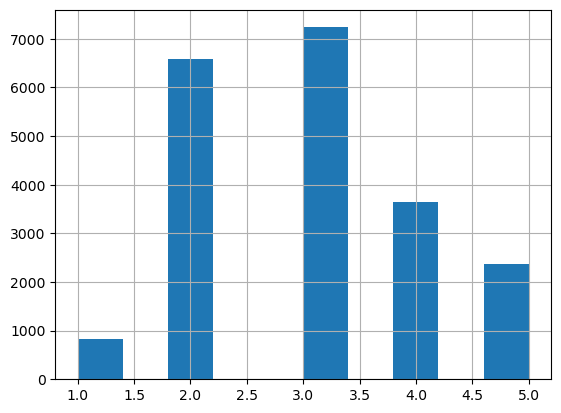

In [13]:
print(housing['income_cat'].value_counts().sort_index())

housing['income_cat'].hist()

- Sau khi đã tạo ra cột ```income_cat``` ta sẽ chia dữ liệu theo tỉ lệ của cột này. 

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = []
split = StratifiedShuffleSplit(
    n_splits=10, 
    test_size=0.2, 
    random_state=42
)

for train_index, test_index in split.split(X=housing, y=housing['income_cat']):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_split.append([strat_train_set_n, strat_test_set_n])

print("Số lượng data splited được tạo: ", len(strat_split))
strat_train_set, strat_test_set = strat_split[0]
print("Số lượng dữ liệu trong tập train: ", len(strat_train_set))
print("Số lượng dữ liệu trong tập test: ", len(strat_test_set))

Số lượng data splited được tạo:  10
Số lượng dữ liệu trong tập train:  16512
Số lượng dữ liệu trong tập test:  4128


In [15]:
print("Tỉ lệ income_cat trong tập test sau khi được chia theo tỉ lệ income_cat của dataset: ")
print(strat_test_set['income_cat'].value_counts().sort_index() / len(strat_test_set))
print("=" * 100)
print("Tỉ lệ income_cat trong tập train sau khi được chia theo tỉ lệ income_cat của dataset: ")
print(strat_train_set['income_cat'].value_counts().sort_index() / len(strat_train_set))
print("=" * 100) 
print("Tỉ lệ income cat trong dataset: ")
housing['income_cat'].value_counts().sort_index() / len(housing)

Tỉ lệ income_cat trong tập test sau khi được chia theo tỉ lệ income_cat của dataset: 
1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: income_cat, dtype: float64
Tỉ lệ income_cat trong tập train sau khi được chia theo tỉ lệ income_cat của dataset: 
1    0.039789
2    0.318859
3    0.350594
4    0.176296
5    0.114462
Name: income_cat, dtype: float64
Tỉ lệ income cat trong dataset: 


1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: income_cat, dtype: float64

- Sau khi sử dụng ```StratifiedShuffleSplit``` để chia theo tỉ lệ income_cat ta thấy ở tập train và test được tạo ra, tỉ lệ của income_cat vẫn tương đồng như của dataset ban đầu. 
- Bảng so sánh các cách chia data

<img src = "./static/compare_stratify_split_data.png" alt="Compare" width="600"/>

- Sau khi đã chia xong data, ta sẽ xóa cột income_cat

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

/tmp/ipykernel_12014/1299016719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
/tmp/ipykernel_12014/1299016719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


# 4. Discover and Visualize the Data to Gain Insights

In [17]:
# Tạo bản sao của tập train để thực hiện các thao tác khác
sample_data = strat_train_set.copy()

- Trong data có các feature mang tính chất địa lý là longitude và latitude, thích hợp cho biểu đồ scatter. 

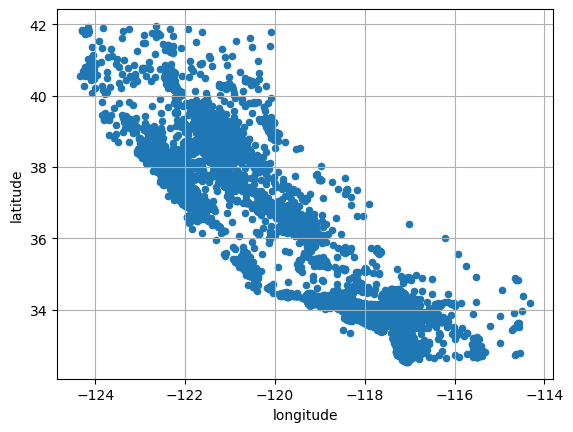

In [18]:
sample_data.plot(kind='scatter', x = 'longitude', y = 'latitude', grid=True)
plt.show()

- Từ biểu đồ ta khó thấy các quy luật đặc biệt, vì vậy ta sẽ setting alpha = 0.1 để visualize rõ ràng các địa điểm - nơ mà chúng có mật độ điểm cao. 
- Dựa vào các tọa độ của các điểm dày đặc ta có thể biết được các quận tập trung chủ yếu ở đâu. 

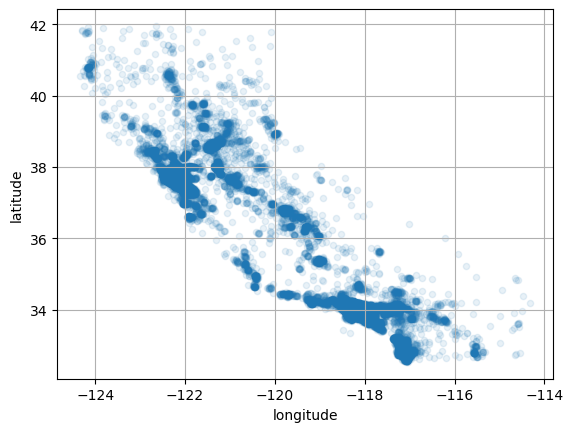

In [19]:
sample_data.plot(kind='scatter', x = 'longitude', y = 'latitude', grid=True, alpha=0.1)
plt.show()

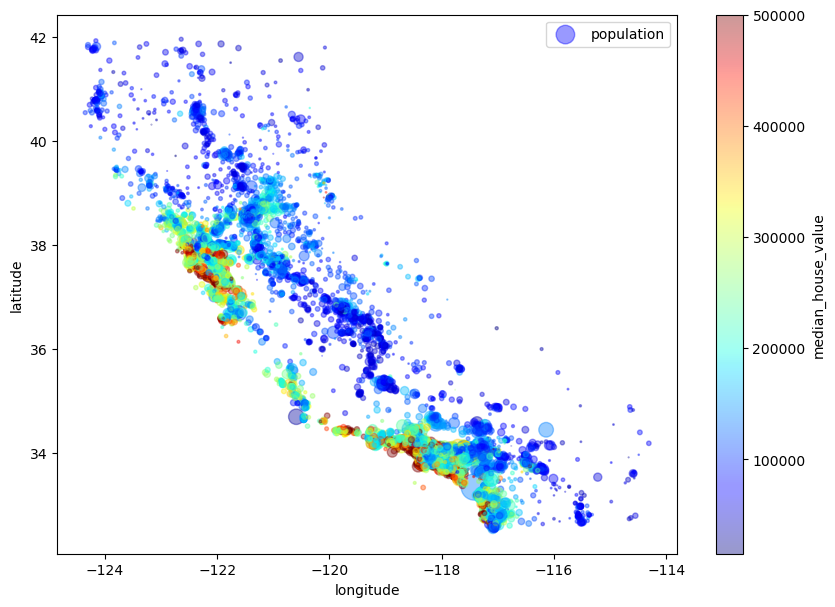

In [20]:
sample_data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
                 s = sample_data['population'] / 100, 
                 label = "population", figsize=(10, 7),
                 c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar=True)
plt.legend()

- s: bán kính của hình tròn tượng trưng cho dân số của quận
- c: màu sắc đại diện cho trung bình giá nhà tại quận đó. 
- Nhìn vào biểu đồ ta có thể thấy
    + Càng ở các vùng ven biển thì giá nhà càng cao
    + Giá nhà cao và số lượng dân cư tập trung ở các quận phổ biến như: San Diago, Los Angeles
    + Càng vào bên trong giá nhà và số lượng dân cư giảm. 

=> Giá và số lượng dân cư tỉ lệ với địa điểm

- ### Ma trận tương quan 

In [21]:
corr_matrix = sample_data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

/tmp/ipykernel_12014/3490104631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sample_data.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- Các feature có độ tương quan với feature ```median_house_value``` giảm dần từ trên xuống và chạy từ (-1, 1)
+ Độ tương quan tiến tới 1: 2 feature có độ tương quan dương - mạnh. Ví dụ: median_house_value lớn thì median income cũng lớn (0.68)
+ Độ tương quan tiến tới -1: 2 feature có độ tương quan âm - yếu. Ví dụ: giá có xu hướng giảm nhẹ khi nhà ở phía bắc (-0.14)
+ Đô tương quan ~ 0: 2 feature không mối tương quan, quan hệ tuyến tính nào. Ví dụ: dân số không ảnh hướng tới giá nhà (-0.02)

- Một cách khác để xem độ tương quan giữa 2 thuộc tính là sử dụng ```scatter_matrix()``` để plot 1 numerical attribute với các numerical attribute khác. 
- Chọn ra 4 numerical attribute có độ tương quan cao để xem độ tương quan giữa chúng  

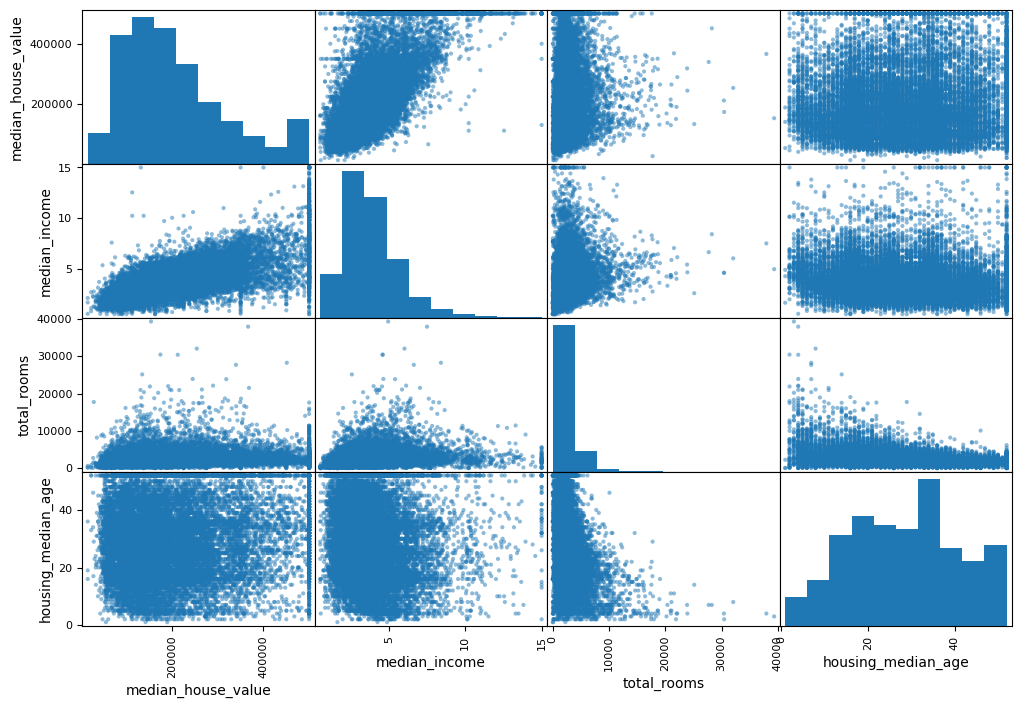

In [22]:
from pandas.plotting import scatter_matrix

atributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(sample_data[atributes], figsize=(12, 8))
plt.show()

- Biểu đồ của các feature với nhau không mang lại thông tin hữu ích.
- Với biểu đồ median_income và median_house_value thì biểu đồ có dạng 1 đường chéo. Điều này cho ta biết 2 feature này có mối tương quan cao. 


- Ta sẽ xem xét kĩ hơn biểu đồ tương quan của 2 feature này

<Axes: xlabel='median_income', ylabel='median_house_value'>

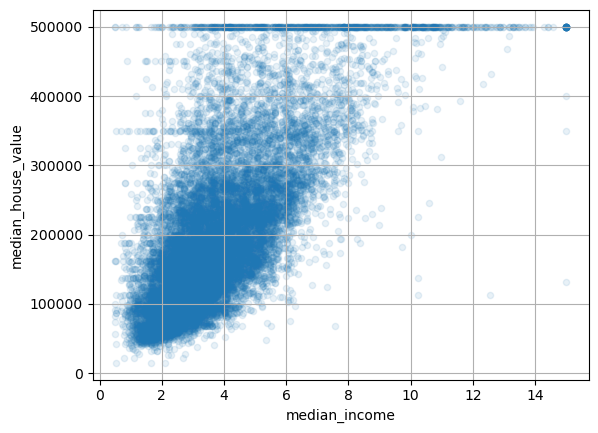

In [23]:
sample_data.plot(kind = "scatter", x = "median_income", y = "median_house_value", 
                  grid = True, alpha =0.1)

- ### Kết hợp thuộc tính

- Việc sử dụng tổng phòng của quận khi không biết số căn nhà có vẻ không hữu ích lắm. 
- Tương tự với tổng số phòng ngủ cũng vậy và ta muốn so sánh cúng với số lương phòng
- Việc kết hợp dân số mỗi căn nhà có vẻ là 1 thuốc tính kết hợp hữu ích. 

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [25]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [26]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

/tmp/ipykernel_12014/2905470689.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

- Nhận thấy thuộc tính mới ```rooms_per_household``` có độ tương quan với ```median_house_value``` cao hơn với thuộc tính ```total_rooms```
- Thuộc tính ```bedrooms_per_room``` và ```population_per_household``` có độ tương quan âm với ```median_house_value```
- ```bedrooms_per_room``` có độ tương quan âm với ```median_house_value``` cao có thể hiểu rằng tỉ lệ phòng ngủ trên tông số phòng cao thì giá trị ngôi nhà càng nhỏ 

-  #### Note: Các bước explore data bên trên có thể được lặp lại sau khi huấn luyện mô hình nào đó -> cho ra kết quả, đánh giá... Từ đó ta có thể xử lý dữ liệu tốt hơn. 

# 5. Prepare the Data for Machine Leatning Algorithms

In [27]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()
print(housing.shape)
print(housing_labels.shape)

(16512, 9)
(16512,)


- ### 5.1 Data cleaning

- ##### 1. Xử lý các data bị missing value(trong data của chúng ta thì cột total_bedrooms đang bị missing data). Có 1 số cách như sau:
    + 1.1: loại bỏ(get rid) các quận tương ứng bị missing 
    + 1.2: Loại bỏ toàn bộ thuộc tính
    + 1.3: Fill vào 1 số giá trị như: zero, mean, median ...

Note: mean: gía trị trung bình của vector
      median: nếu vector có size lẻ -> số ở giữa; size chẵn -> trung bình 2 số ở giữa (Dãy đã được sắp xếp)

In [28]:
housing.dropna(subset=['total_bedrooms']) # option 1
housing.drop(columns=['total_bedrooms'], axis = 1) # option2
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace = True)

In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


- Sklearn cũng hỗ trợ thư viện ```SimpleImputer``` để xử lý các giá trị bị missing. 
- Lợi ích của thư viện này là có thể lưu trữ các giá trị median, mean... cho mỗi feature. Và nó có thể fill cho các tập train, test, set và bất kì data mới nào. Một số giá trị khác strategy = ['mean', 'most_frequent', ] hoặc là 'constant' + tham số fill_value = ...

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # khởi tạo instance

housing_num = housing.drop(columns=['ocean_proximity'], axis = 1) # thư viện chỉ xử lý data dạng numerical
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [31]:
print("Các giá trị median của các feature: \n", imputer.statistics_) 
print("Giá trị median tính từ data ban đầu: ", housing_num.median().values)

Các giá trị median của các feature: 
 [-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
Giá trị median tính từ data ban đầu:  [-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


- ##### 2. Xử lý các giá trị là dạng object

In [32]:
from sklearn.preprocessing import OrdinalEncoder


housing_cat = housing[['ocean_proximity']]
oridinal_encoder = OrdinalEncoder()
housing_cat_encoded = oridinal_encoder.fit_transform(housing_cat)
print("Giá trị ở dạng object: ", oridinal_encoder.categories_)
print("Giá trị ở dạng numerical sau khi được encode: ", np.unique(housing_cat_encoded))

Giá trị ở dạng object:  [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
Giá trị ở dạng numerical sau khi được encode:  [0. 1. 2. 3. 4.]


- Có 1 vấn đề trong việc encode từ object -> numerical như trên. Mô hình ML sẽ hiểu các con số 0, 1 là gần giống nhau tuy nhiên ở dạng object thì có thể không như vậy. 
- 1 cách tốt hơn là sử dung one-hot-encoding

In [33]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot # dạng sparse matrix sẽ tiết kiệm memory hơn bằng cách lưu idx của số 1 và số lượng số 1
housing_cat_1hot.toarray().shape # chuyển sparse matrix sang dạng array

(16512, 5)

# 6. Feature Scaling and Transformation

#### 1. Scale cho các feature ở tập train

- ML Algorithm sẽ không hoạt động tốt trên các numerical attributes có các scale khác nhau. Vì vậy ta cần đưa các attribute này về cùng 1 khoảng. 
- 1. Normalization: X - min_X / (range_X = max_X - min_X)
- 2. Standardization: X - mean_X / std_X
- Lưu ý: các giá trị std, mean của tập train sẽ được sử dụng cho tập test, crossvalidate thay vì tính std, mean của các tập này. 

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) # option1 
housing_num_min_max_scaled = min_max_scaler.fit_transform(X=housing_num)
pd.DataFrame(data=housing_num_min_max_scaled).head()

,0,1,2,3,4,5,6,7
0,-0.424303,0.270988,0.098039,-0.803276,-0.743879,-0.874772,-0.737117,-0.769148
1,0.418327,-0.883103,-0.764706,-0.729664,-0.725193,-0.887217,-0.713966,-0.194852
2,0.057769,-0.398512,0.686275,-0.917994,-0.900773,-0.962779,-0.888723,-0.672405
3,0.438247,-0.955367,-0.098039,-0.904818,-0.833441,-0.949830,-0.820388,-0.761865
4,0.125498,-0.630181,0.019608,-0.820420,-0.792526,-0.897194,-0.784167,-0.448766


In [35]:
standard_scaler = StandardScaler() # option 2
housing_std_scaled = standard_scaler.fit_transform(X=housing_num)
pd.DataFrame(data=housing_std_scaled).head()

,0,1,2,3,4,5,6,7
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752


- Min max scaling bi ảnh hưởng bởi outlier nhiều hơn standard scaling. 
- Min max saling bị ảnh hưởng bởi giá trị -> khi có các điểm outlier có gía trị lớn thì ảnh hưởng sẽ khá nhiều. Với standard scaling thì tập trung vào phân phối của các điểm dữ liệu nên không bị ảnh hưởng nhiều bởi các điểm outlier
- Giả sử khi min max scaling scale về đoạn 0-1

<img src = "./static/min_max_scaling.png" alt="Min-max-scaling" width="600"/>

- Khi phân phối của các feature có kiểu ```heavy-tail``` được hiểu là những giá trị cách xa giá trị trung bình thì không hiếm. Khi đó cả 2 kỹ thuật trên đều ép các giá trị vào 1 vùng nhỏ dẫn đến các ML model không làm tốt.
- Vì vậy trước khi feature scaling, tpnga sẽ giảm ```heavy-tail``` hoặc tốt hơn là nên tạo cho nó 1 phân phối đối xứng. Một cách để xử lý ```heavy-tail``` khi phần đuôi lệch về bên phải là lấy căn bậc 2 hoặc log.

<img src = "./static/heavy-tail.jpeg" alt="Heavy-tail" width="600"/>

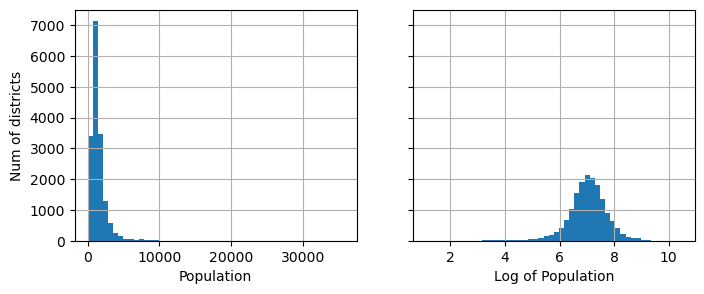

In [36]:
fig, axs = plt.subplots(1, 2, figsize = (8, 3), sharey = True)
housing['population'].hist(ax = axs[0], bins = 50)
housing['population'].apply(np.log).hist(ax = axs[1], bins = 50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of Population")
axs[0].set_ylabel("Num of districts")
plt.show()

- Một cách khác để xử lý ```heavy-tail``` là ```bucketizing``` - có nghĩa là chi distribution thành các phần bằng nhau để chuyển thành dạng ```uniform-distribution```

<img src = "./static/bucketizing.png" alt="bucketizing" width="600"/>

[1.0956869999999999, 1.268362, 1.409898, 1.5057, 1.6033549999999999, 1.6607, 1.7188, 1.7733160000000001, 1.8438, 1.9045400000000001]


Text(0, 0.5, 'Number of districts')

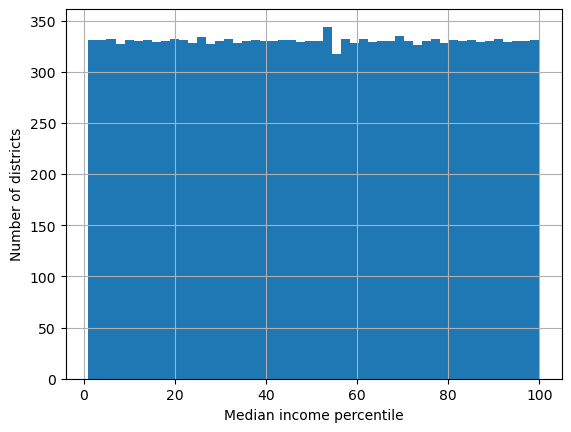

In [37]:
percentiles = [np.percentile(housing['median_income'], p) for p in range(1, 100)]
print(percentiles[:10])

flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")

### 2. Scale các giá trị cho tập test
- Nếu phân phối của label cũng ở dạng ```heavy-tail``` thì cũng cần phải thay thế bằng các giá trị log. Sau khi scale, model sẽ dự đoán ra các giá trị đã được scale. Vậy khi predict cần phải chuyển dạng scale về gía trị ban đầu.  

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scaled_label = std_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(X=housing[['median_income']], y=scaled_label)
some_new_data = housing[['median_income']].iloc[:5]

scaled_predictions = model.predict(X=some_new_data)
print(scaled_predictions)
print("=" * 50) 
predictions = std_scaler.inverse_transform(X=scaled_predictions) # chuyển về giá trị ban đầu
print(predictions)

[[-0.61407017]
 [ 0.88791396]
 [-0.36105202]
 [-0.59502347]
 [ 0.22384052]]
[[135958.75805364]
 [309735.008975  ]
 [165232.3998617 ]
 [138162.41971241]
 [232903.1766333 ]]


### 3. Custom Transformers

In [39]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted


class StandardScaledClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean = True):
        self.with_mean = with_mean
    
    def fit(self, X, y = None): # y is required even though we don't use it
        X = check_array(X)  # kiểm tra input 
        self.mean = X.mean(axis = 0)
        self.std = X.std(axis = 0)
        self.n_feature_in_ = X.shape[1] # cần attr này trong fit để đảm bảo dữ liệu chuẩn xác cho transform() và predict()
        return self
    
    def transform(self, X):
        check_is_fitted(X) # kiểm tra input 
        X = check_array(X)
        assert self.n_feature_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean
        return X / self.std


In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self,n_clusters = 10, gamma = 1.0, random_state = None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    
    def fit(self, X, y = None, sample_weight = None):
        self.kmeans = KMeans(n_clusters=self.n_clusters, n_init=10,
                             random_state=self.random_state)
        self.kmeans.fit(X=X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans.cluster_centers_, gamma = self.gamma) # tính độ tương đồng dựa vào các cluster center
    
    def get_feature_names_out(self, names = None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)] 

- Tạo ra 10 cluster, sau đó gọi fit_transform() với latitude và longitude của sample trong training set. Gán trọng số là giá của mỗi ngôi nhà
- Sau đó transform() sẽ sử dụng kmean để xác định 10 group trong training set, sau đó sử dụng RBF Kernel để đo độ tương tự giữa các district với 10 cluster center
- Kết quả là khoảng cách từ 1 samle đến 10 cluster 

In [42]:
cluster_simi = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
similarities = cluster_simi.fit_transform(housing[['latitude', 'longitude']],
                                          sample_weight = housing_labels)

In [43]:
similarities[:3].round(2)

array([[0.  , 0.31, 0.  , 0.85, 0.  , 0.  , 0.  , 0.  , 0.16, 0.49],
       [0.11, 0.  , 0.  , 0.  , 0.94, 0.  , 0.  , 0.41, 0.  , 0.  ],
       [0.11, 0.  , 0.15, 0.  , 0.  , 0.37, 0.  , 0.02, 0.  , 0.  ]])

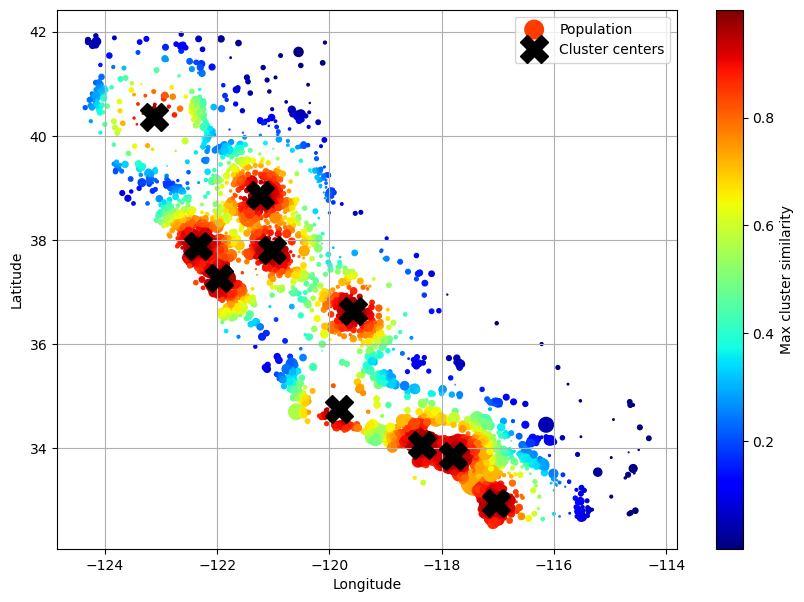

In [44]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simi.kmeans.cluster_centers_[:, 1],
         cluster_simi.kmeans.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

### 4. Transformation Pipelines

In [45]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer()),
    ("standardize", StandardScaler())
])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer()), ('standardize', StandardScaler())])

- Trường hợp không muốn đặt tên cho các estimator trong pipeline thì sử dụng ```make_pipeline```

In [46]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline( SimpleImputer(), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [47]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
df_housing_num_prepared = pd.DataFrame(
    data=housing_num_prepared, 
    columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index
)
df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752


In [48]:
num_pipeline.set_params(simpleimputer__strategy="median")


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

- Tạo ra một pipeline để xử lý tất cả các columns numerical và category

In [49]:
from sklearn.compose import ColumnTransformer

num_attributes = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 
                  'total_bedrooms', 'households', 'median_income', ]
cat_attributes = ['ocean_proximity']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes)
])

- Một cách khác để không phải xử lý tay cho từng cột

In [50]:
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [51]:
housing_prepared = preprocessing.fit_transform(X=housing)
pd.DataFrame(data=housing_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0


##### **Note pipeline** : 
- Fill vào các missing value thành các giá trị median, với các giá trị categorical thì thay thế bằng các giá trị most frequent
- Các categorial được one-hot-encoding
- Tinh toán 1 số feature dựa trên các feature khác để tạo ra feature có thông tin giá trị hơn
- Các feature có dạng heavy-tail sẽ được thay các giá trị bằng các giá trị log để chuyển về dạng uniform distribution
- Scale các feature theo standardized

In [52]:
from sklearn.preprocessing import FunctionTransformer


def column_ratio(X):
    return X[:, [0]] / X[:, [1]] # tạo ra feature mới từ 2 cột trong X

def ratio_name(function_transformer, feature_names_in):
    return ['ratio']

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

cluster_simi = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
default_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
    ("rooms_per_house", ratio_pipeline(), ['total_rooms', 'households']),
    ("people_per_house", ratio_pipeline(), ['population', 'households']),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", 
                           "households", "median_income"]),
    ("geo", cluster_simi, ['latitude', 'longitude']),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
remainder = default_pipeline) # one column remaining: housing_median_age


In [53]:
housing_prepared = preprocessing.fit_transform(X=housing)
housing_prepared.shape

(16512, 24)

In [54]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# 7. Select and Train a Model

#### Train và Evaluate trên tập training set

##### 7.1 Sử dụng Linear Regresstion

In [55]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e4ffbe7bb00>,
                                                                                       func=<...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e4ffbeda710>)])),
                ('linearregression', LinearRegression())])

In [56]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:10].round(2)

array([  70709.1 ,  288178.48,  186037.9 ,  189650.27,  270702.43,
        225100.02,  354891.8 ,  308373.37,  220874.46, -139669.61])

In [57]:
housing_labels[:10].values

array([ 72100., 279600.,  82700., 112500., 238300., 165700., 412300.,
       349600., 181300., 500001.])

In [58]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions, 
                              squared=False) # 
print("Độ chênh lệch trên toàn bộ dữ liệu: ", lin_rmse)

Độ chênh lệch trên toàn bộ dữ liệu:  69239.95619019221


/home/ducpham/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Độ chênh lệch trên dữ liệu và model dự đoán quá lớn => model underfiting

##### 7.2 Sử dụng Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e4ffbe7bb00>,
                                                                                       func=<...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e4ffbeda710>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [60]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_predictions, housing_labels, squared=False)
print("Độ chênh lệch trên toàn bộ dữ liệu: ", tree_rmse)

Độ chênh lệch trên toàn bộ dữ liệu:  0.0


/home/ducpham/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- model Decision Tree đang bị overfiting  khi độ chênh lệch giữa label và predict = 0  

##### 7.3 Sử dụng Cross-Validation
- Chia bộ dữ liệu ra làm 10 phần riêng biệt(folds), sau đó sẽ đánh giá model 10 lần, mỗi lần sẽ chọn ra (random) 9 folds để train và 1 folds để đánh giá 

In [61]:
from sklearn.model_selection import cross_val_score

tree_rmse = -cross_val_score(estimator=tree_reg, X=housing, y=housing_labels, 
                             scoring="neg_root_mean_squared_error", cv=10)

- ```scoring="neg_root_mean_squared_error": ``` trong sklearn sử dụng hàm loss đối ngược với hàm RMSE nên cần phải có dấu âm ở đầu  

In [62]:
pd.Series(tree_rmse).describe()

count       10.000000
mean     67370.675173
std       3582.815877
min      62118.730843
25%      64487.233745
50%      67618.622566
75%      69227.770860
max      73928.860955
dtype: float64

##### 7.4 Sử dụng Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor())
forest_rmse = -cross_val_score(estimator=forest_reg, X=housing, y=housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)

In [64]:
pd.Series(forest_rmse).describe()

count       10.000000
mean     47276.405797
std       2419.256239
min      43778.345040
25%      45247.156322
50%      47306.140907
75%      49260.155116
max      50763.116134
dtype: float64

# 8. Fine-tuning model 

#### Grid Search 
- key(```preprocessing__geo__n_clusters```): được Sklearn xử lý như sau: 
    + 1. Split theo ```__```, tìm estimator có tên là ```preprocessing```
    + 2. Trong estimator đó tìm tên của preprocessor ```geo```
    + 3. Trong preprocessor đó tìm tham số  ```n_clusters```
- Grid search sẽ đánh giá 9 cặp với dict thứ nhất và 6 cặp với dict thứ 2. Với tham số cv = 3 thì Grid search sẽ phải thử trên (9 + 6) * 3 = 45 lần. Sau đó nó sẽ tìm ra bộ tham số tối ưu nhất 

In [65]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {
        "preprocessing__geo__n_clusters": [5, 8, 10],
        "random_forest__max_features": [4,6, 8],
    },
    {
        "preprocessing__geo__n_clusters": [10, 15],
        "random_forest__max_features": [6, 8, 10],
    },
]

grid_search = GridSearchCV(estimator=full_pipeline, 
                           param_grid=param_grid, 
                           cv=3,
                           scoring = "neg_root_mean_squared_error")
grid_search.fit(housing, housing_labels)

/home/ducpham/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer()),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<function ratio_name...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e4ffbeda710>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [66]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [67]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
# cv_res.head()

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43521,44557,45021,44366
13,15,8,43677,44497,45495,44556
14,15,10,44189,45106,46182,45159
7,10,6,44452,45273,46452,45392
9,10,6,44452,45273,46452,45392


#### Randomized Search 

- Grid Search hiệu quả khi số lượng tham số cần thử ít, nhưng khi số lượng tham số cần thử lớn thì thuật toán này chạy mất nhiều thời gian. Vì vậy ta sẽ dùng Randomized Search

- Thay vì phải search hết trên không gian lớn thì Randomized Search sẽ chọn ra các gía trị ngẫu nhiên từ không gian đã xác định và chạy trên lượng iterations đã cho trước. 

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        "preprocessing__geo__n_clusters": randint(low = 3, high = 50),
        "random_forest__max_features": randint(low = 2, high = 20),
    }
rnd_seach =RandomizedSearchCV(
    full_pipeline, 
    param_distributions=param_distribs,
    n_iter=10,
    cv=3, 
    scoring="neg_root_mean_squared_error",
    random_state=42
)
rnd_seach.fit(housing, housing_labels)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer()),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function rati...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5026b30550>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e502f5e9690>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [69]:
rnd_seach.best_params_

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

In [70]:
cv_res = pd.DataFrame(rnd_seach.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
# cv_res.head()

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41450,42999,43230,42560
8,32,7,41892,43493,43621,43002
5,42,4,41918,44009,43505,43144
0,41,16,42651,43515,44232,43466
2,23,8,42893,43547,44483,43641


- Sklearn còn hỗ trợ 2 class ```HalvingRandomSeachCV``` và ```HalvingGridSearchCV```. Mục tiêu của các class này  để sử dụng tài nguyên của máy tính hiệu quả và train nhanh hơn hoặc để tìm ra số lượng hyperparameter trong không gian lớn  
- Cách hoạt động: 
    + Ở vòng đầu, nhiều giá trị hyperparam kết hơp (được gọi là ứng cử viên) được tạo ra thông qua Random hoặc Grid search
    +  Sau đó các ứng cử viên này được sử dụng để train và đánh giá thông qua cross-validation. Tuy nhiên trog quá trình train thì nó chỉ sử dụng số ít data, điều này giúp tăng quá trình train và loại bỏ được bớt các ứng cử viên không tốt.
    + Ở vòng tiếp theo chỉ còn các candidate tốt được giữ lại, tại đây các candidate được tiếp cận với nhiều data hơn 
    + Thông qua các vòng thì candidate cuối sẽ được đánh giá trên toàn bộ data

#### Anlyzing the Best Models and Their Errors

In [75]:
final_model = rnd_seach.best_estimator_
feature_importances = final_model['random_forest'].feature_importances_
print(feature_importances.round(2))
print(len(feature_importances.round(2)))

[0.07 0.06 0.05 0.01 0.01 0.01 0.01 0.18 0.01 0.02 0.03 0.01 0.01 0.01
 0.02 0.01 0.   0.   0.02 0.02 0.01 0.02 0.   0.02 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.   0.01 0.01 0.01 0.01 0.   0.01 0.   0.03 0.01 0.   0.08 0.
 0.   0.   0.01]
59


In [74]:
sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()), reverse=True)

[(0.1813831690256434, 'log__median_income'),
 (0.08244502861607364, 'cat__ocean_proximity_INLAND'),
 (0.0718801580236537, 'bedrooms__ratio'),
 (0.05817301838233788, 'rooms_per_house__ratio'),
 (0.049517115363919215, 'people_per_house__ratio'),
 (0.03248219147637665, 'geo__Cluster 2 similarity'),
 (0.028221062269895562, 'geo__Cluster 43 similarity'),
 (0.022653278091252674, 'geo__Cluster 6 similarity'),
 (0.02198898088685375, 'geo__Cluster 15 similarity'),
 (0.021199799837403884, 'geo__Cluster 10 similarity'),
 (0.01773675216603871, 'geo__Cluster 11 similarity'),
 (0.016812078342102393, 'geo__Cluster 24 similarity'),
 (0.0166587519568679, 'geo__Cluster 13 similarity'),
 (0.015499668492902265, 'geo__Cluster 1 similarity'),
 (0.014115237838677923, 'geo__Cluster 23 similarity'),
 (0.01354873263940505, 'geo__Cluster 25 similarity'),
 (0.012858660059159845, 'geo__Cluster 0 similarity'),
 (0.012738526960538106, 'remainder__housing_median_age'),
 (0.012678159416906736, 'geo__Cluster 36 similar

# 9. Evaluate Your System on the Test Set

In [76]:
X_test = strat_test_set.drop("median_house_value", axis = 1)
Y_test = strat_test_set['median_house_value'].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_pred=final_predictions, y_true=Y_test, squared=False)
print(final_rmse)

39565.359517373756


/home/ducpham/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# 10. Model persistence using joblib


In [79]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

Now you can deploy this model to production. For example, the following code could be a script that would run in production:


In [ ]:

import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)